# Business Intelligence Project
# November 2023
---

### Admission Number: 136017

# Step 1: Problem Definition and Goal Setting
#### This step lays the foundation for the entire project, guiding subsequent stages. For this project the goal was to build a model that can accurately predict if patients are likely to have the presence or absence of Cardiovasular diseases to aid in hospitals' healthcare systems.

## Import libraries that will be used:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, \
RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report,\
confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_roc_curve

# Step 2: Data Selection

---
The data was obtained from [Kaggle](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset).

In [2]:
df = pd.read_csv('C:/Users/unika/authsystem/data/cardio_train.csv', sep= ';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [6]:
df.cardio.value_counts(normalize= True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

### Data contents:

* 70,000 data points
* Almost equal counts of patients with and without cardiovascular disease
* Six continuous features, six categorical features

### Data feature descriptions:
1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

## Multivariate Plots
### Scatter Matrix:

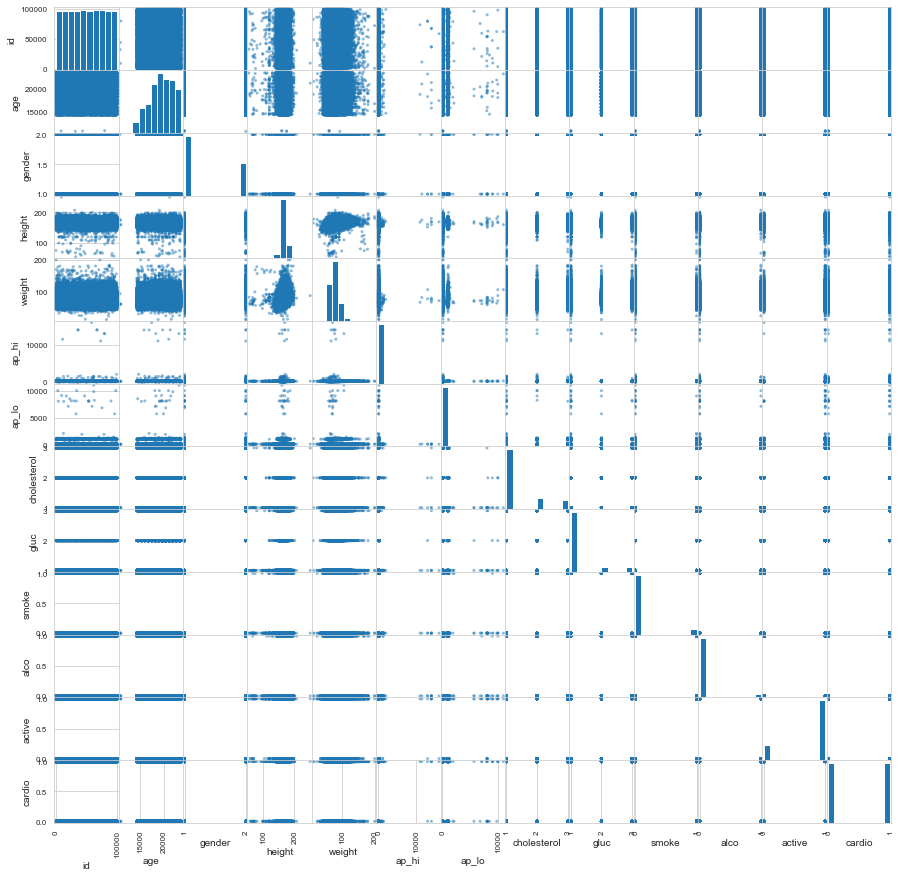

In [7]:
# scatter matrix to visualize data
pd.plotting.scatter_matrix(df, figsize = [15,15]);

# Step 3: Data Cleansing and Pre-Processing


In [8]:
# Check for missing values
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
# check for duplicate values
df.duplicated().sum()

0

In [10]:
# drop id column
df.drop('id', axis= 1, inplace= True)

# change gender from 1 or 2 to 0 or 1
df['gender'].replace(2, 0, inplace= True)

# change age from days to years
df['age'] = round(df['age'] / 365, 1)

In [11]:
print(df.age.min())
df.age.max()

29.6


65.0

The data contains adults from ages 29 - 65 years old.

In [12]:
# check heights 
df[df['height'] < 125]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
224,59.7,0,76,55.0,120,80,1,1,0,0,1,0
3420,39.8,1,100,70.0,100,70,1,1,0,0,1,0
3735,48.3,1,120,70.0,120,70,1,1,0,0,1,0
3752,42.2,1,120,30.0,110,70,1,1,0,0,1,0
4212,44.1,1,120,80.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65302,50.6,1,99,60.0,90,60,1,1,0,0,1,0
66023,40.0,1,120,80.0,120,70,2,1,0,0,1,0
66479,46.4,0,110,90.0,110,90,1,1,0,0,1,0
66643,51.6,1,57,61.0,130,90,1,1,0,0,1,1


In [13]:
# 125cm (4') seems short for the weights that are associated with them
# so we'll drop them
df = df[df['height'] >= 125]

In [14]:
df[df['height'] > 200]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6486,58.1,1,250,86.0,140,100,3,1,0,0,1,1
21628,52.2,0,207,78.0,100,70,1,1,0,1,1,0


In [15]:
# a height of 250cm (8'2") and a weight of 86kg (190lbs) seems suspicious
df.drop(index=6486, inplace= True)

Now we will check out the odd numbers on ap_hi and ap_lo

A quick note about ap_hi and ap_lo:
Systolic and diastolic are the readings on blood pressure. 

In [16]:
# find where ap_lo is higher than ap_hi
df = df[df['ap_hi'] > df['ap_lo']]

In [17]:
# remove ap_hi and ap_lo with negative and extremely low numbers
# anything with systolic < 80 and diastolic < 50 is considered abnormally low
df = df[df['ap_hi'] > 80]
df = df[df['ap_lo'] > 50]

In [18]:
# remove any ap_hi an ap_lo readings that are abnormally high
df = df[df['ap_hi'] < 250]

In [19]:
# while these diastolic readings are very high, 
# they are still lower than the systolic and match other features
df[df['ap_lo'] > 150]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4781,51.9,1,158,74.0,200,170,1,1,0,0,1,1
4981,62.3,0,173,74.0,220,160,2,2,0,0,1,1
38022,59.6,1,161,84.0,196,182,2,2,0,0,1,1
43998,62.1,0,163,70.0,200,180,1,1,0,0,0,1
54987,53.4,1,169,80.0,200,160,3,3,0,0,1,0


remove the incredibly low values for "weight"

In [20]:
#40kg = 88lbs, this would indicate a underweight person, or a typo in the data
df = df[df['weight'] >= 40]

In [21]:
# reset index
df.reset_index(inplace= True, drop= True)

In [22]:
# change feature names
new_names = {'ap_hi' : 'systolic', 
             'ap_lo' : 'diastolic', 
             'gluc' : 'glucose', 
             'alco': 'alcohol', 
             'cardio': 'disease'
            }

In [23]:
df = df.rename(columns= new_names)

In [24]:
df.shape

(68413, 12)

In [25]:
df.disease.value_counts(normalize= True)

0    0.504729
1    0.495271
Name: disease, dtype: float64

Data cleaning removed 1,488 data points from the original 70,000 and we still have an even number of patients with and without CVD.

## Exploratory Data Analysis:
#### Here each of the input features was compared against the target varibale with various univariate and multivariate plots to illustrate the relationships.

### BMI analysis

Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. BMI is defined as the body mass divided by the square of the body height, and is universally expressed in units of kg/m², resulting from mass in kilograms and height in meters.

In [26]:
df_eda = df.copy()

<AxesSubplot:xlabel='height', ylabel='weight'>

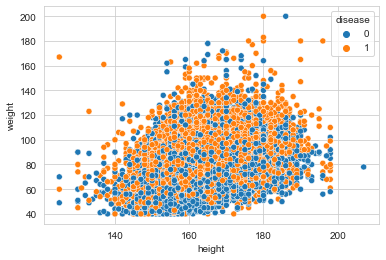

In [27]:
sns.scatterplot(x= 'height', y= 'weight', hue= 'disease', data= df_eda)

In [28]:
# create BMI feature
def BMI (data):
    return round(data['weight'] / (data['height'] / 100) **2, 2)

df_eda['BMI'] = df_eda.apply(BMI, axis= 1)

In [29]:
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
age,68413.0,53.333130,6.759749,29.60,48.40,54.00,58.40,65.00
gender,68413.0,0.650973,0.476666,0.00,0.00,1.00,1.00,1.00
height,68413.0,164.450835,7.842102,125.00,159.00,165.00,170.00,207.00
weight,68413.0,74.153387,14.259347,40.00,65.00,72.00,82.00,200.00
systolic,68413.0,126.744961,16.620734,85.00,120.00,120.00,140.00,240.00
diastolic,68413.0,81.366188,9.376343,52.00,80.00,80.00,90.00,182.00
cholesterol,68413.0,1.364931,0.679155,1.00,1.00,1.00,2.00,3.00
glucose,68413.0,1.225864,0.571804,1.00,1.00,1.00,1.00,3.00
smoke,68413.0,0.087966,0.283247,0.00,0.00,0.00,0.00,1.00
alcohol,68413.0,0.053396,0.224824,0.00,0.00,0.00,0.00,1.00


Text(0, 0.5, 'BMI')

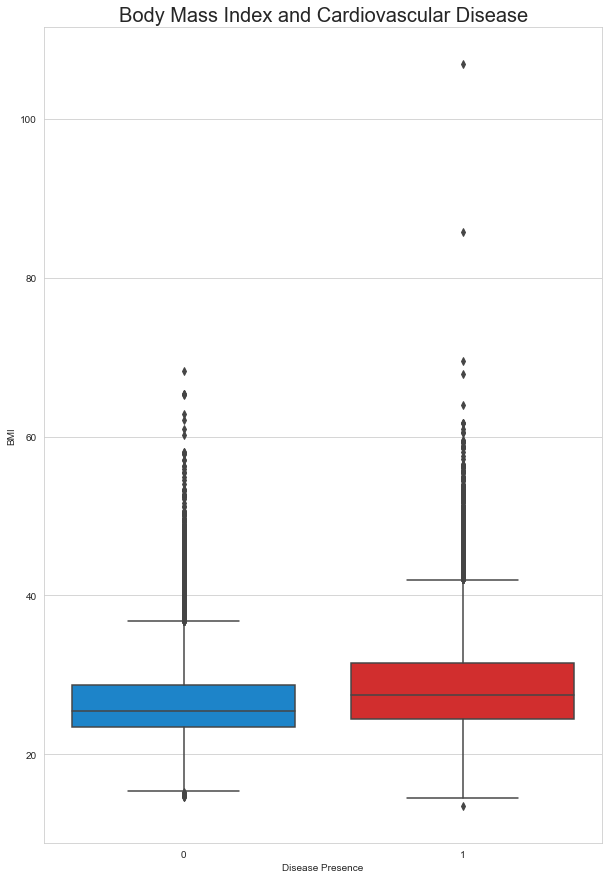

In [30]:
pal = ['#008ae6' , '#ec1313']

plt.figure(figsize= (10,15))
sns.boxplot(x = 'disease', y= 'BMI', data= df_eda, palette= pal)
plt.title('Body Mass Index and Cardiovascular Disease', fontsize= 20)
plt.xlabel('Disease Presence')
plt.ylabel('BMI')

This boxplot shows that individuals with CVD have, on average, higher body mass indexes than those that do not have CVD.

### Blood Pressure Category analysis

Blood pressure is the pressure of circulating blood against the walls of blood vessels. Most of this pressure results from the heart pumping blood through the circulatory system.

In [31]:
#function to categorize blood pressure
def bp_categories(systolic, diastolic):
    if systolic > 180 or diastolic > 120:
        return 'Crisis'
    elif (140 <= systolic < 180) or (90 <= diastolic < 120):
        return 'HBP_stage2'
    elif (130 <= systolic < 140) or (80 <= diastolic < 90) :
        return 'HBP_stage1'
    elif (120 <= systolic < 130) and diastolic < 80:
        return 'Elevated'
    else:
        return 'Normal'

In [32]:
# HTN is abbreviation for hypertension
df_eda['HTN_stage'] = df_eda[['systolic', 'diastolic']].apply\
(lambda x: bp_categories(*x), axis= 1)

In [33]:
df_eda.HTN_stage.value_counts()

HBP_stage1    32429
HBP_stage2    23120
Normal         9471
Elevated       3097
Crisis          296
Name: HTN_stage, dtype: int64

Text(0, 0.5, '# of Patients')

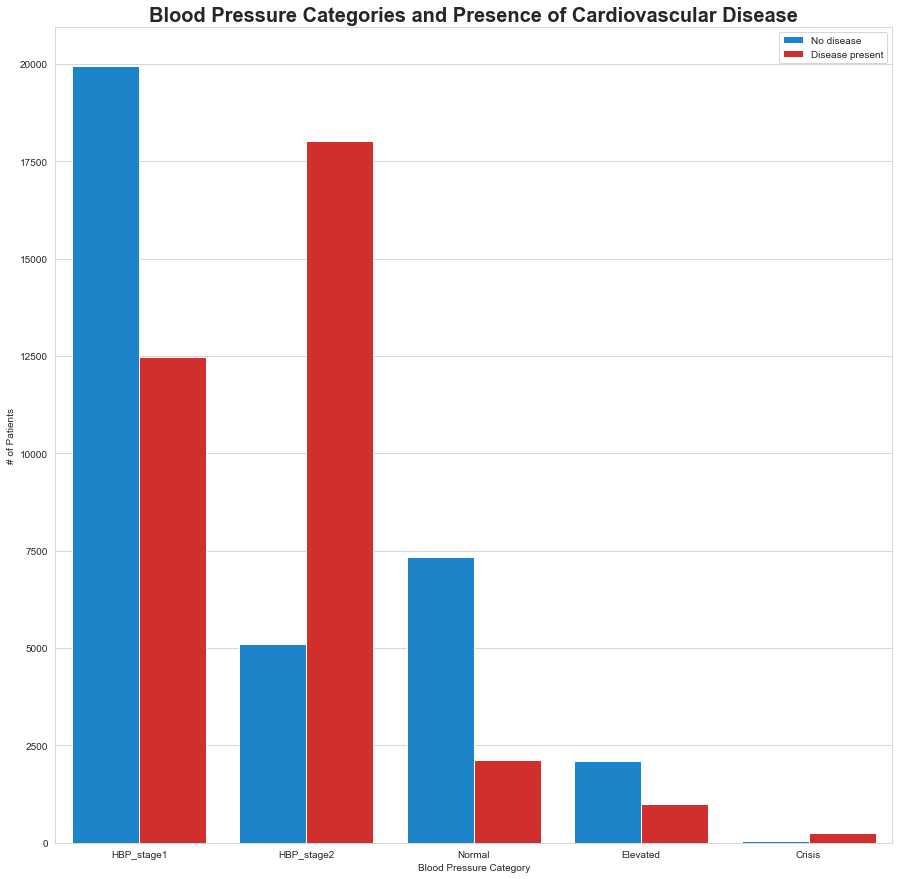

In [34]:
pal = ['#008ae6' , '#ec1313']

plt.figure(figsize= (15,15))
sns.countplot(x= 'HTN_stage', hue= 'disease', data= df_eda, palette= pal)
plt.title('Blood Pressure Categories and Presence of Cardiovascular Disease', 
          fontweight= 'bold', fontsize= 20)
plt.xlabel('Blood Pressure Category')
plt.legend( ['No disease', 'Disease present'])
plt.ylabel('# of Patients')

Groups that have a higher prevalence of cardiovascular disease have blood pressure that could be classified as Hypertension Stage 2 or Hypertensive Crisis.

The other categories, Normal, Elevated, and Hypertension Stage 1 have a higher prevalence of patients without cardiovascular disease, though it is still present.

### Age analysis

In [35]:
print(df_eda.age.min())
print(df_eda.age.max())
df_eda[df_eda['age'] < 30]

29.6
65.0


,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol,active,disease,BMI,HTN_stage
6072,29.8,1,175,59.0,120,80,1,1,0,0,1,0,19.27,HBP_stage1
21837,29.6,0,175,92.0,100,60,1,1,0,0,1,0,30.04,Normal
29970,29.8,1,159,59.0,120,80,1,1,0,0,1,0,23.34,HBP_stage1


In [36]:
# bin ages into categories
df_eda.loc[(df_eda['age'] < 40), 'age_range'] = 30
df_eda.loc[(df_eda['age'] >= 40) & (df_eda['age'] < 50), 'age_range'] = 40
df_eda.loc[(df_eda['age'] >= 50) & (df_eda['age'] < 60), 'age_range'] = 50
df_eda.loc[(df_eda['age'] >= 60) & (df_eda['age'] < 70), 'age_range'] = 60


In [37]:
df_eda.age_range.value_counts(normalize= True)

50.0    0.507082
40.0    0.278427
60.0    0.191528
30.0    0.022963
Name: age_range, dtype: float64

Text(0, 0.5, 'Patients')

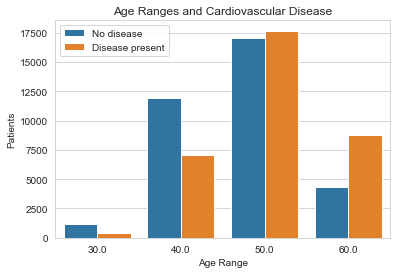

In [38]:
sns.countplot(x= 'age_range', hue= 'disease', data= df_eda)
plt.title('Age Ranges and Cardiovascular Disease')
plt.xlabel('Age Range')
plt.legend( ['No disease', 'Disease present'])
plt.ylabel('Patients')

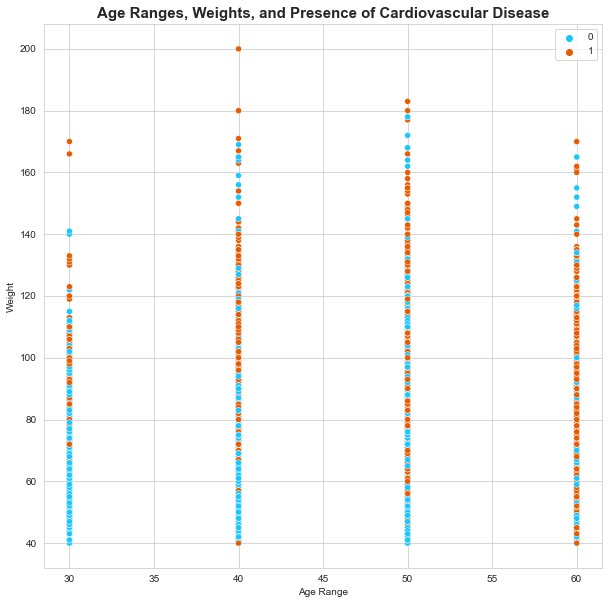

In [39]:
plt.figure(figsize= (10,10))
pal = ['#1ac6ff', '#e65c00']

sns.scatterplot(x= 'age_range', y= 'weight', hue= 'disease', data= df_eda, palette= pal)
plt.title('Age Ranges, Weights, and Presence of Cardiovascular Disease', 
          fontweight= 'bold', fontsize= 15)
plt.xlabel('Age Range')
plt.ylabel('Weight')
plt.legend()

Here we can see that as a person gets older, their chances of being diagnosed with CVDs increases. We can also see that weight doesn't really have an impact as much as age does. 

### Gender analysis

In [40]:
# determine which is male/female
df_eda.groupby('gender')['height'].mean()

gender
0    170.030279
1    161.459347
Name: height, dtype: float64

In [41]:
df_eda.groupby('gender')['weight'].mean()

gender
0    77.191369
1    72.524535
Name: weight, dtype: float64

In [42]:
df_eda.gender.value_counts(normalize= True)

1    0.650973
0    0.349027
Name: gender, dtype: float64

"0" in both analyses have the higher number. Historically, men are taller than women. Hence can assume that the "0" refers to male and "1" refers to females. However, it is improtant to note that the data is imbalanced (almost $1/3$ to $2/3$).

Text(0, 0.5, 'Patients')

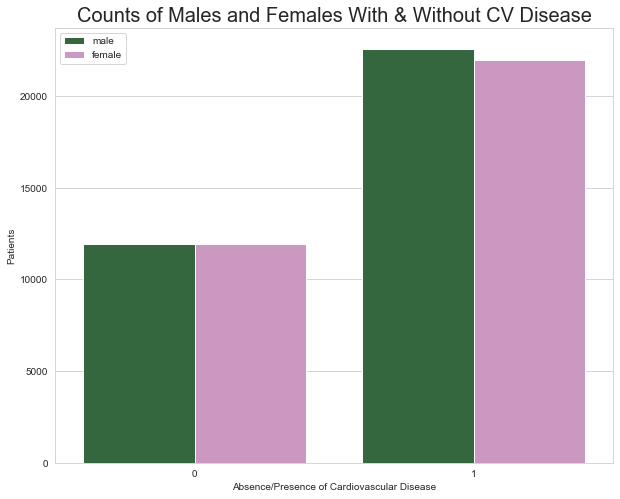

In [43]:
legend_labels = ['male', 'female']

plt.figure(figsize= (10, 8))
plt.title('Counts of Males and Females With & Without CV Disease', fontsize= 20)
sns.countplot(x= 'gender', hue= 'disease', data= df_eda, palette= 'cubehelix')
plt.xlabel('Absence/Presence of Cardiovascular Disease')
plt.legend(legend_labels)
plt.ylabel('Patients')

This bar graph shows that even though there is almost double the amount of women in the data, there are even amounts of CVD present within each gender.

In [44]:
df_eda.groupby('gender')['disease'].mean()

gender
0    0.499832
1    0.492826
Name: disease, dtype: float64

#### Cholesterol

In [45]:
df_eda.cholesterol.value_counts(normalize= True)

1    0.749814
2    0.135442
3    0.114744
Name: cholesterol, dtype: float64

Text(0, 0.5, '# of Patients')

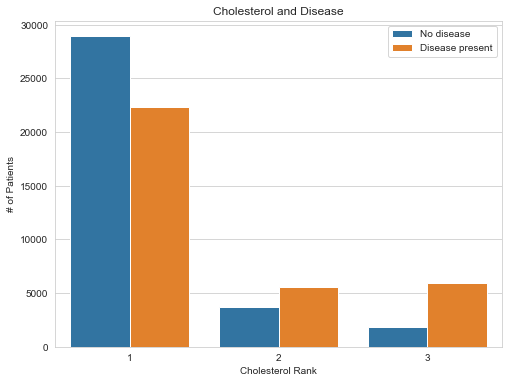

In [46]:
plt.figure(figsize= (8,6))
sns.countplot(x= 'cholesterol', hue= 'disease', data= df_eda)
plt.legend( ['No disease', 'Disease present'])
plt.title('Cholesterol and Disease')
plt.xlabel('Cholesterol Rank')
plt.ylabel('# of Patients')

Text(6.800000000000004, 0.5, 'Has Disease')

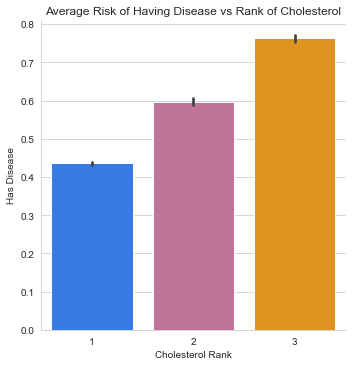

In [47]:
pal = ['#1a75ff', '#cc6699', '#ff9900']
sns.catplot(x= 'cholesterol', y= 'disease', data= df_eda, kind= 'bar', 
            palette= pal)
plt.title('Average Risk of Having Disease vs Rank of Cholesterol')
plt.xlabel('Cholesterol Rank')
plt.ylabel('Has Disease')

Having cholesterol levels "above normal" and "well above normal" increase an individuals chances of being diagnosed with cardiovascular disease. However, having "normal" cholesterol levels does not decrease your chances. There are many individuals with normal cholesterol levels and CVD.

76% of patients with cholesterol "well above normal" also have cardiovascular disease.

In [48]:
df_eda.groupby('cholesterol')['disease'].mean()

cholesterol
1    0.435971
2    0.597237
3    0.762420
Name: disease, dtype: float64

#### Activity

In [49]:
df_eda.active.value_counts(normalize= True)

1    0.803458
0    0.196542
Name: active, dtype: float64

<Figure size 864x720 with 0 Axes>

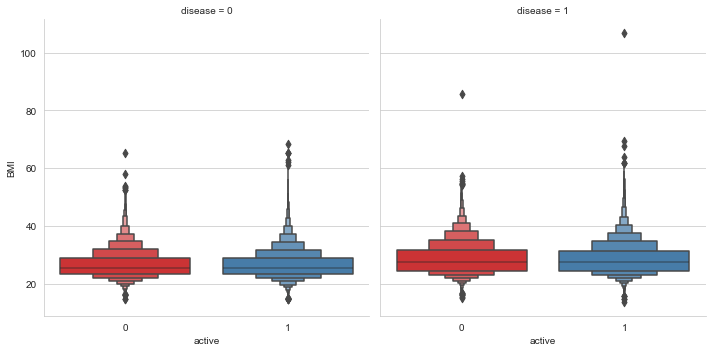

In [50]:
plt.figure(figsize= (12, 10))
sns.catplot(x='active', y='BMI', col='disease', data=df_eda, kind='boxen', 
            palette='Set1')

This visualization shows that patients without cardiovascular disease have similar body mass indexes, regardless of whether they classify themselves as active or not.

There is a slightly higher BMI for individuals that do have cardiovascular disease, but again, does not really differ if the patient is / is not active.

In [51]:
df_eda.groupby(['disease', 'active'])['BMI'].mean()

disease  active
0        0         26.521442
         1         26.460297
1        0         28.540764
         1         28.436058
Name: BMI, dtype: float64

#### Glucose

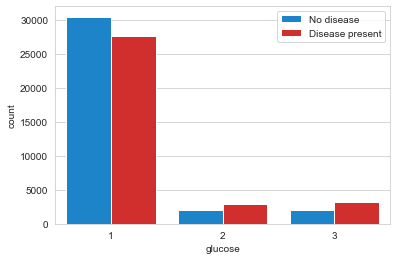

In [52]:
pal = ['#008ae6' , '#ec1313']
sns.countplot(x= 'glucose', hue= 'disease', data= df_eda, palette= pal)
plt.legend( ['No disease', 'Disease present'])

Glucose levels that are "normal" do not seem to have any relationship to having the disease or not. In fact, a patient has almost a 50% chance of having cardiovascular disease even with a normal glucose measurement. The risk of being diagnosed with cardiovascular disease increases with increasing levels of glucose.

In [53]:
df_eda.groupby('glucose')['disease'].mean()

glucose
1    0.476171
2    0.589378
3    0.617528
Name: disease, dtype: float64

#### Drink alcohol and smoke

In [54]:
df_eda.groupby(['alcohol', 'smoke'])['disease'].mean()

alcohol  smoke
0        0        0.497266
         1        0.481851
1        0        0.514054
         1        0.440377
Name: disease, dtype: float64

In [55]:
df_eda.groupby(['alcohol', 'smoke'])['disease'].count()

alcohol  smoke
0        0        60545
         1         4215
1        0         1850
         1         1803
Name: disease, dtype: int64

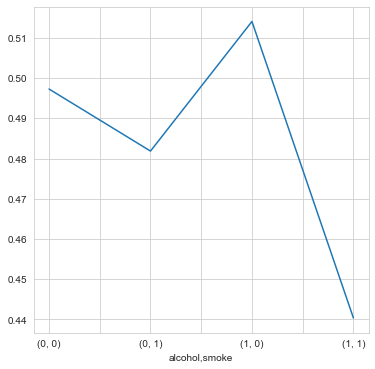

In [56]:
fig= plt.figure(figsize= (6,6))
al_smo = df_eda.groupby(['alcohol', 'smoke'])['disease'].mean().plot()

This line graph shows that an individual that claims to drink alcohol and smoke has the lowest risk of being diagnosed with CVD. However, because these features are subjective and vague (drink how much, smoke what?), it is unwise to definitively say that drinking and smoking is better for your heart.
Additionally, the risk of having CVD decreases when looking at drinking OR smoking. This should lead one to consider subjective information to be potentially less accurate.

### Heatmap:

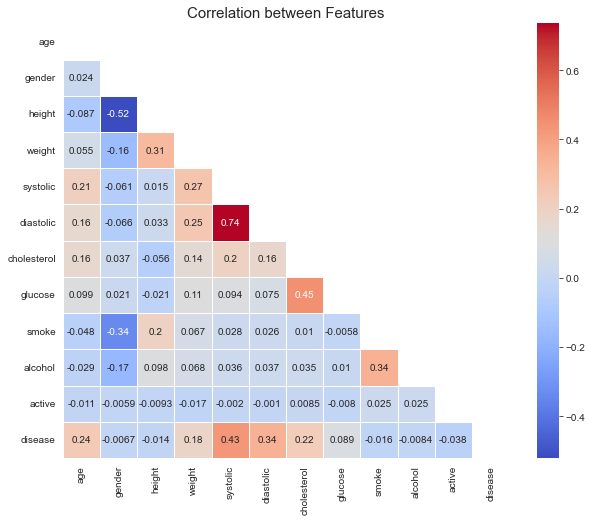

In [57]:
corr = df.corr()

plt.figure(figsize= (10,8))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(df.corr(), cmap= 'coolwarm', mask= mask, linewidths= 1, annot= True)
plt.title('Correlation between Features', fontsize= 15)
plt.show()

The highest correlation (positive or negative) is between systolic and diastolic. The second highest is between height and gender.

The features with the highest correlation on disease are systolic, diastolic, age, and cholesterol.

# Step 4: Data Transformation

### One hot encode, Split, and Standardize

In [58]:
df['cholesterol'] = df['cholesterol'].astype('category')
df['glucose'] = df['glucose'].astype('category')

In [59]:
df = pd.get_dummies(df, prefix=['chol', 'gluc'], drop_first=True)

In [60]:
y = df['disease']
X = df.drop('disease', axis= 1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

In [62]:
y_test.shape

(17104,)

In [63]:
scaler = StandardScaler()

In [64]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Selection of the Data Mining Task

In [65]:
# instantiate classifiers for vanilla models
classifiers = {
    'Logistic Regression' : LogisticRegression(), 
    'Random Forest' : RandomForestClassifier(), 
    'Support Vector Machine' : SVC(), 
    'K-Nearest Neighbors' : KNeighborsClassifier(), 
    'Decision Tree' : DecisionTreeClassifier(), 
    'XGBoost' : XGBClassifier()
}

In [66]:
# create DataFrame to hold results from vanilla models
# takes approx 2 mins to run
results = pd.DataFrame(columns= ['Train_accuracy', 'Test_accuracy', 'F1_score', 
                                'False_Negative', 'True_Positive'])

# predict, get accuracy and f1 scores and add to dataframe
conf_matrices = []
for key, value in classifiers.items():
    # fit models
    value.fit(X_train, y_train)
    train_pred = value.predict(X_train)
    y_pred = value.predict(X_test)
    
    # get accuracy, f1 score
    train_acc = accuracy_score(y_train, train_pred) * 100
    test_acc = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred)
    
    # get false neg and true positive
    # add to confusion matrices list to view later if desired
    cm = confusion_matrix(y_test, y_pred)
    FN = cm[1][0]
    TP = cm[1][1]
    conf_matrices.append(cm)
    
    # add measurements to datafram
    results.loc[key] = [round(train_acc, 2), round(test_acc, 2), 
                        round(f1, 2), round(FN, 0), round(TP, 0)]

False negatives are the patients that have heart disease, but were not diagnosed with having heart disease. To make sure the model catches as many as possible, we will want to watch how the tuning affects that and true positives (both of which together are "recall").

In [67]:
results.sort_values(by= ['F1_score', 'False_Negative'], ascending= False)

,Train_accuracy,Test_accuracy,F1_score,False_Negative,True_Positive
Logistic Regression,72.84,72.81,0.71,2827.0,5635.0
Support Vector Machine,73.78,73.22,0.71,2790.0,5672.0
XGBoost,76.38,72.81,0.71,2702.0,5760.0
Random Forest,99.55,71.33,0.71,2567.0,5895.0
K-Nearest Neighbors,78.40,69.08,0.69,2694.0,5768.0
Decision Tree,99.55,63.13,0.63,3178.0,5284.0


# Hyperparameter Tuning

In [68]:
# function to get results after each model

def get_results(model, model_name):
    train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    # get classification report
    print('{} Classification Report'.format(model_name))
    print(classification_report(y_test, y_pred))
    
    # get confusion matrix
    plot_confusion_matrix(model, X_test, y_test, cmap= "Blues", values_format= '.5g')
    plt.grid(False)
    plt.show()
    
    # get accuracy and F1 scores
    train_acc = accuracy_score(y_train, train_pred) * 100
    test_acc = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred)
    
    #get false neg and true positive
    cm = confusion_matrix(y_test, y_pred)
    FN = cm[1][0]
    TP = cm[1][1]
    
    # save measurements into results df
    results.loc[model_name] = [round(train_acc, 2), round(test_acc, 2), 
                               round(f1, 2), round(FN, 0), round(TP, 0)]

#### XGBoost 

In [69]:
# Instantiate classifier
xgb = XGBClassifier()

In [70]:
# create hyperparameter grid
param_grid_xgb = {
    'learning_rate': [0.08],
    'max_depth': [4],
    'min_child_weight': [2, 3],
    'n_estimaters' : [125, 150],
    'scale_pos_weight' : [1.5, 1.7]
}

# Instantiate Randomized Search
# n_jobs : Number of jobs to run in parallel. -1 means using all processors.
RS_xgb = RandomizedSearchCV(xgb, param_grid_xgb, n_jobs= 3, scoring= 'recall', 
                            random_state=42)

In [71]:
# fit model
# approx 1 min to run
RS_xgb.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                   

In [72]:
RS_xgb.best_params_

{'scale_pos_weight': 1.7,
 'n_estimaters': 125,
 'min_child_weight': 2,
 'max_depth': 4,
 'learning_rate': 0.08}

RS XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.77      0.62      0.69      8642
           1       0.68      0.81      0.74      8462

    accuracy                           0.72     17104
   macro avg       0.72      0.72      0.71     17104
weighted avg       0.72      0.72      0.71     17104



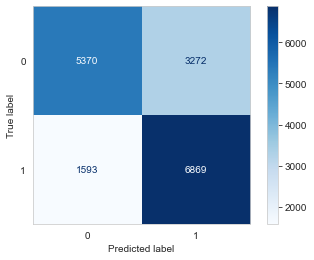

In [73]:
# see model results and add to results df
get_results(RS_xgb, 'RS XGBoost')

In [74]:
# see how new model compares to
# original vanilla matrix that wasn't tuned
conf_matrices[5]

array([[6694, 1948],
       [2702, 5760]], dtype=int64)

This new model reduces the number of people that were told they didn't have the disease when they actually do by 1,053 patients when compared to the vanilla model. That is a 6% reduction!

#### Random Forest

In [75]:
# Instantiate classifier
RF = RandomForestClassifier()

In [76]:
param_grid_RF = {
    'n_estimators' : [200],
    'max_depth' : [100], 
    'min_samples_split' : [5, 8], 
    'min_samples_leaf' : [3],
    'class_weight' : [{1 : 1.5}, {1 : 1.7}]
}

# Instantiate Randomized Search
RS_RF = RandomizedSearchCV(RF, param_grid_RF, n_iter= 20, scoring= 'recall', 
                           random_state= 42)

In [77]:
# fit model
# approx 2 mins to run
RS_RF.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'class_weight': [{1: 1.5}, {1: 1.7}],
                                        'max_depth': [100],
                                        'min_samples_leaf': [3],
                                        'min_samples_split': [5, 8],
                                        'n_estimators': [200]},
                   random_state=42, scoring='recall')

In [78]:
RS_RF.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 100,
 'class_weight': {1: 1.7}}

RS Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.75      0.66      0.70      8642
           1       0.69      0.78      0.73      8462

    accuracy                           0.72     17104
   macro avg       0.72      0.72      0.72     17104
weighted avg       0.72      0.72      0.72     17104



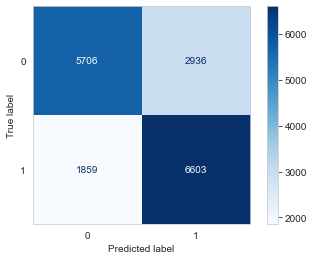

In [79]:
# see model results and add to results df
get_results(RS_RF, 'RS Random Forest')

#### K-Nearest Neighbor

In [80]:
# Instantiate classifier
KNN = KNeighborsClassifier()

In [81]:
# set parameter guidelines
param_grid_KNN = {
    'n_neighbors' : [23, 25, 27], 
    'weights' : ['uniform', 'distance']
}

# Instantiate Grid Search
GS_KNN = GridSearchCV(KNN, param_grid_KNN, n_jobs= 3, scoring= 'recall')

In [82]:
# fit model
# approx 1 min to run
GS_KNN.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=3,
             param_grid={'n_neighbors': [23, 25, 27],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [83]:
GS_KNN.best_params_

{'n_neighbors': 23, 'weights': 'distance'}

GS KNN Classification Report
              precision    recall  f1-score   support

           0       0.71      0.74      0.73      8642
           1       0.72      0.69      0.71      8462

    accuracy                           0.72     17104
   macro avg       0.72      0.72      0.72     17104
weighted avg       0.72      0.72      0.72     17104



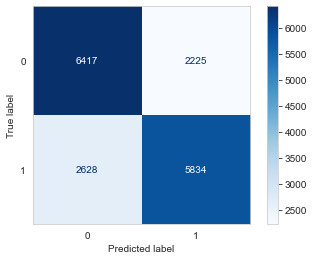

In [84]:
# see model results and add to results df
get_results(GS_KNN, 'GS KNN')

#### Support Vector Machines

In [85]:
# Instantiate classifier
svc = SVC(class_weight = {1: 1.5}, random_state= 42)

In [86]:
# fit model
# approx 2 mins to run
svc.fit(X_train, y_train)

SVC(class_weight={1: 1.5}, random_state=42)

Tuned SVM Classification Report
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      8642
           1       0.70      0.78      0.73      8462

    accuracy                           0.72     17104
   macro avg       0.73      0.72      0.72     17104
weighted avg       0.73      0.72      0.72     17104



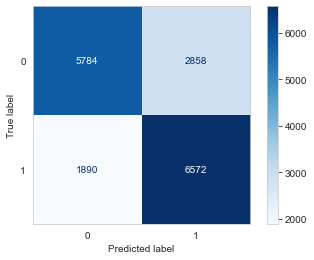

In [87]:
# see model results and add to results df
get_results(svc, 'Tuned SVM')

#### Logistic Regression

In [88]:
# Instantiate classifier
LG = LogisticRegression()

In [89]:
# set parameter criteria
param_grid_LG = {
    'penalty': ['l1', 'l2'],
    'C':[0.05, 0.1, 1], 
    'class_weight' : [None, {1 : 1.5}], 
    'random_state' : [42]
}

# Instantiate Grid Search
GS_LG = GridSearchCV(LG, param_grid_LG, scoring= 'recall')

In [90]:
# fit model
# approx 1 sec to run
GS_LG.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.05, 0.1, 1], 'class_weight': [None, {1: 1.5}],
                         'penalty': ['l1', 'l2'], 'random_state': [42]},
             scoring='recall')

In [91]:
GS_LG.best_params_

{'C': 0.05, 'class_weight': {1: 1.5}, 'penalty': 'l2', 'random_state': 42}

GS Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.76      0.64      0.69      8642
           1       0.68      0.79      0.73      8462

    accuracy                           0.71     17104
   macro avg       0.72      0.71      0.71     17104
weighted avg       0.72      0.71      0.71     17104



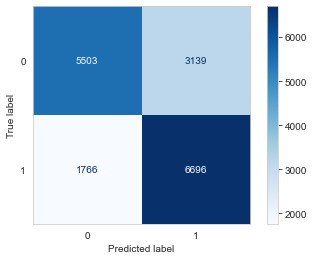

In [92]:
# see model results and add to results df
get_results(GS_LG, 'GS Logistic Regression')

#### Decision Tree

In [93]:
# Instantiate classifier
DT = DecisionTreeClassifier()

In [94]:
# set parameter criteria
param_grid_DT = {
    'max_depth' : [3, 4, 5], 
    'min_samples_split' : [0.01, 0.05, 0.1], 
    'min_samples_leaf' : [5, 7], 
    'class_weight' : [{1 : 1.4}, {1 : 1.6}]
}

# Instantiate Randomized Search
RS_DT = RandomizedSearchCV(DT, param_grid_DT, n_jobs= 3, random_state=42)

In [95]:
# approx 1 sec to run
RS_DT.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_jobs=3,
                   param_distributions={'class_weight': [{1: 1.4}, {1: 1.6}],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [5, 7],
                                        'min_samples_split': [0.01, 0.05, 0.1]},
                   random_state=42)

In [96]:
RS_DT.best_params_

{'min_samples_split': 0.05,
 'min_samples_leaf': 5,
 'max_depth': 5,
 'class_weight': {1: 1.4}}

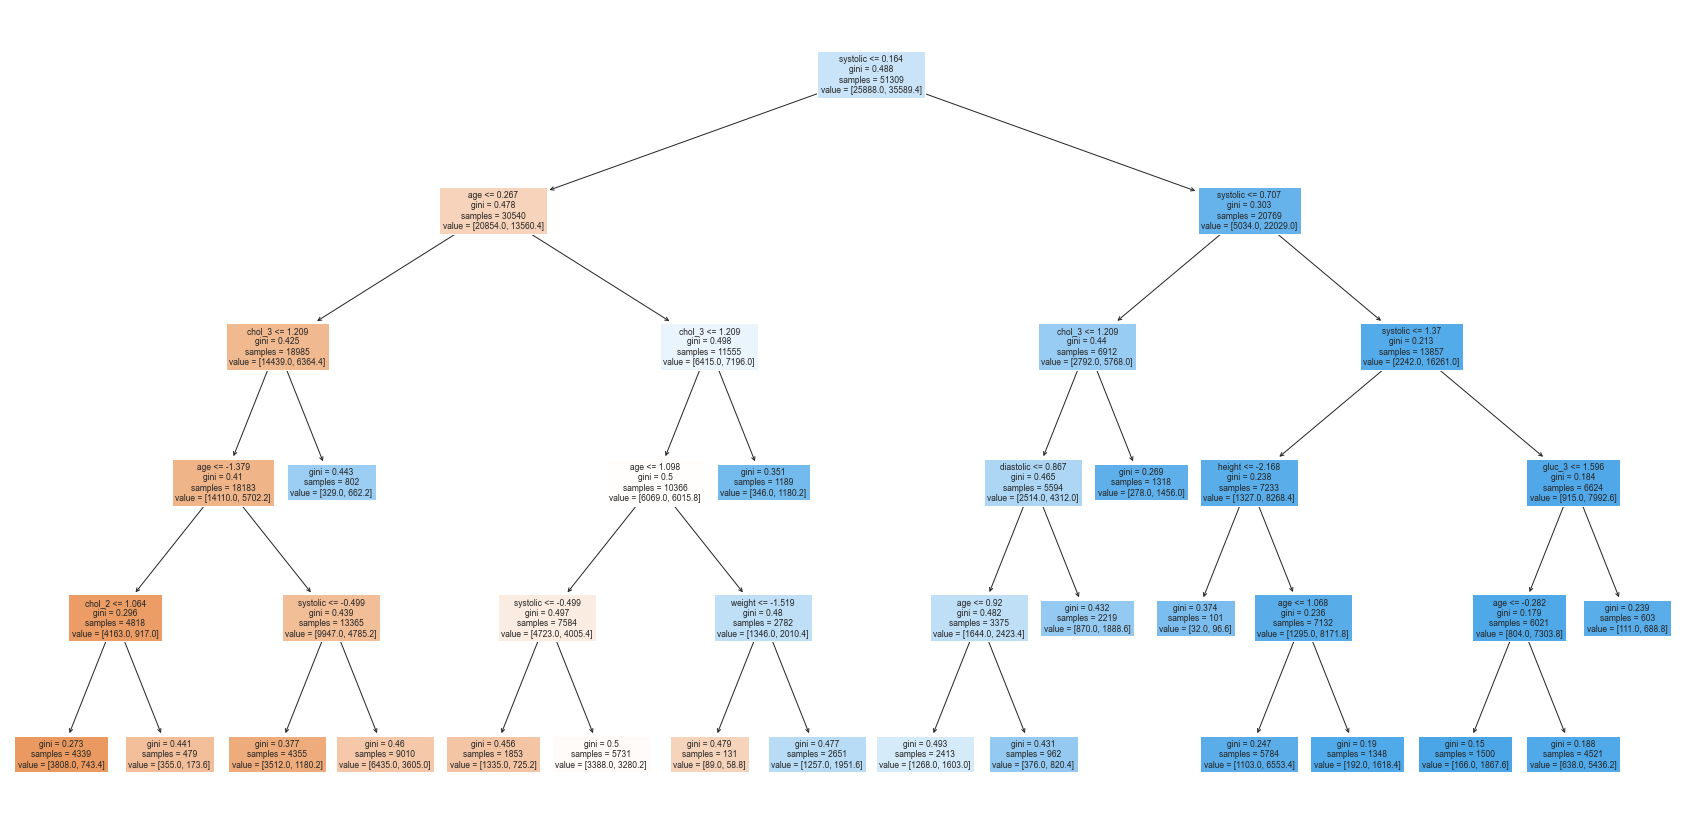

In [97]:
plt.figure(figsize= (30,15))
_ = plot_tree(RS_DT.best_estimator_ , feature_names = X.columns, filled= True) 

RS Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      8642
           1       0.73      0.73      0.73      8462

    accuracy                           0.73     17104
   macro avg       0.73      0.73      0.73     17104
weighted avg       0.73      0.73      0.73     17104



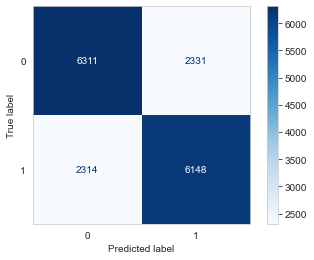

In [98]:
get_results(RS_DT, 'RS Decision Tree')

#### Extremely Tuned XGBoost

In [99]:
# Instantiate classifier
xgb2 = XGBClassifier(scale_pos_weight= 3, n_estimators= 125, 
                     min_child_weight= 3, max_depth= 4, learning_rate= 0.08, 
                     random_state= 42)

In [100]:
# fit model
xgb2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Extra Tuned XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.83      0.37      0.52      8642
           1       0.59      0.92      0.72      8462

    accuracy                           0.65     17104
   macro avg       0.71      0.65      0.62     17104
weighted avg       0.71      0.65      0.62     17104



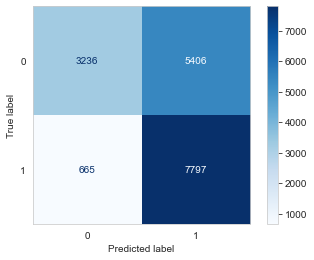

In [101]:
# see model results and add to results df
get_results(xgb2, 'Extra Tuned XGBoost')

While this model leaves only 3.86% of people that have CVD undiagnosed, it is a less accurate model. Having a low number of false negatives causes false positives to rise. The other hyperparameter tuned XGBoost had 19.34% of false positives (people that did not have heart disease, but were told they did). Here, that rises to a staggering 31.64%.  

# Step 7:Selection of the Data Mining Algorithm

### Results

In [102]:
# view all results
results = results.sort_values(by= ['F1_score', 'False_Negative'], 
                              ascending= False)
results

,Train_accuracy,Test_accuracy,F1_score,False_Negative,True_Positive
RS XGBoost,72.02,71.56,0.74,1593.0,6869.0
RS Decision Tree,72.83,72.84,0.73,2314.0,6148.0
Tuned SVM,73.02,72.24,0.73,1890.0,6572.0
RS Random Forest,81.83,71.97,0.73,1859.0,6603.0
GS Logistic Regression,71.53,71.32,0.73,1766.0,6696.0
Extra Tuned XGBoost,65.01,64.51,0.72,665.0,7797.0
Logistic Regression,72.84,72.81,0.71,2827.0,5635.0
Support Vector Machine,73.78,73.22,0.71,2790.0,5672.0
XGBoost,76.38,72.81,0.71,2702.0,5760.0
GS KNN,99.55,71.63,0.71,2628.0,5834.0


Since we are looking at medical data, missing a diagnosis of cardiovascular disease could be deadly. But we had to weigh that against misdiagnosing too many people that don't have the disease and telling them to get a bunch of expensive tests. We also didn't want to hurt the accuracy of the prediction, so we walked a fine line. 

That is why looking at F1 score (conveys the balance between the precision and the recall) and false negatives are so important to this prediction.

We can see that the tuned XGBoost was able to predict the most True Positive and fewest false negatives. It has the highest F1 score and testing and training accuracy are very similar suggesting no overfitting.

The tuned decision tree had the most improvement and train/test accuracies are almost equal, but it is one of the worst tuned models with regards to false negatives (misclassified 700 more than tuned XGBoost)

# Step 7: Utilization of the Data Mining Algorithm
### Specifically the XGBoost Model

In [ ]:
import pickle

# After the model is trained, save it to a pickle file
model_filename = 'xgboost_model.pkl'  # Specify the file name

# Open a file for writing
with open(model_filename, 'wb') as model_file:
    # Use 'pickle.dump' to serialize and save the trained model
    pickle.dump(RS_xgb, model_file)

print(f"XGBoost model has been saved to {model_filename}")


# Step 8: Interpretation and Evaluation

### Test Accuracy

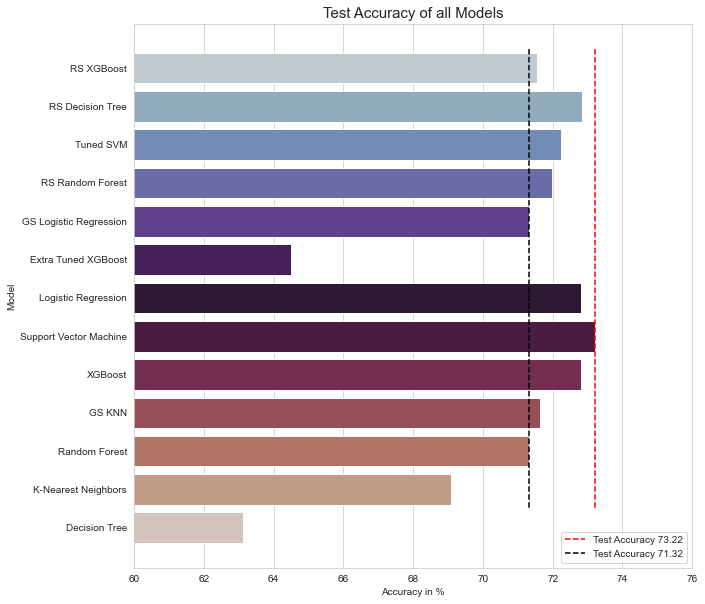

In [103]:
# see results in bar graph
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x= results['Test_accuracy'], y= results.index, palette = 'twilight')
plt.vlines(x = 73.22, ymin = -.5, ymax = 11.5, linestyle= 'dashed', 
           color = 'r', label= 'Test Accuracy 73.22')
plt.vlines(x = 71.32, ymin = -.5, ymax = 11.5, linestyle= 'dashed', 
           color = 'black', label= 'Test Accuracy 71.32')
plt.title('Test Accuracy of all Models', fontsize= 15)
plt.ylabel('Model')
plt.xlabel('Accuracy in %')
plt.xlim(60, 76)
ax.legend(loc = 'lower right')

The highest accuracy score is at 73.22% by the untuned support vector machine model. The tuned XGBoost model's test accuracy is 71.32% - which happens to be the same as the tuned logistic regression.

### ROC Curve 

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. 

Text(0, 0.5, 'True Positive Rate')

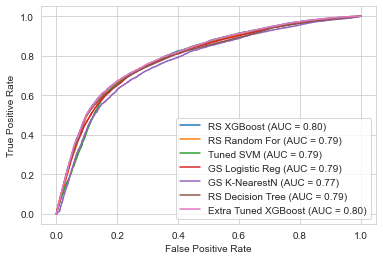

In [104]:
#ROC curve of best 6 models
fig = plot_roc_curve(RS_xgb, X_test, y_test, name= 'RS XGBoost')
plot_roc_curve(RS_RF,X_test, y_test, ax = fig.ax_, name= 'RS Random For')
plot_roc_curve(svc,X_test, y_test, ax = fig.ax_, name= 'Tuned SVM')
plot_roc_curve(GS_LG,X_test, y_test, ax = fig.ax_, name= 'GS Logistic Reg')
plot_roc_curve(GS_KNN,X_test, y_test, ax = fig.ax_, name= 'GS K-NearestN')
plot_roc_curve(RS_DT,X_test, y_test, ax = fig.ax_, name= 'RS Decision Tree')
plot_roc_curve(xgb2, X_test, y_test, ax= fig.ax_, name= 'Extra Tuned XGBoost')

# fig.figure.suptitle('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

While most of the tuned models perform similarly, the tuned XGBoost again slightly outperforms the other models.

### Feature Importance

In [105]:
# create DataFrame with feature importance to create nice looking graph
#  using tuned XGBoost model
FeatImp={'feature_names' : X.columns.values, 
         'feature_importance' : RS_xgb.best_estimator_.feature_importances_}
FI_df = pd.DataFrame(FeatImp)
FI_df.sort_values(by= ['feature_importance'], ascending= False, inplace= True)

Text(0, 0.5, 'Feature')

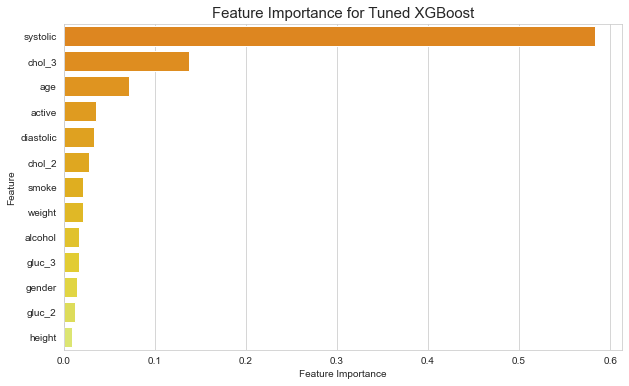

In [106]:
# plot new DataFrame
plt.figure(figsize= (10,6))
sns.barplot(x= FI_df['feature_importance'], y= FI_df['feature_names'], 
            palette= 'Wistia_r')
plt.title('Feature Importance for Tuned XGBoost', fontsize= '15')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

In [107]:
FI_df

,feature_names,feature_importance
4,systolic,0.583638
10,chol_3,0.137935
0,age,0.071950
8,active,0.035083
5,diastolic,0.032743
9,chol_2,0.027678
6,smoke,0.021073
3,weight,0.020866
7,alcohol,0.016810
12,gluc_3,0.016663


The systolic reading is by far the most important feature in predicting cardiovascular disease. Having a cholesterol well above normal, and a person's age are the second and third most important features, respectively.

Activity is the highest subjective feature, followed closely by smoking as the next subjective feature.

### Conclusion

XGBoost with adjusted hyperparameters was the model with the best overall performance. 
Because it has the greatest F1 score, the highest frequencies of true positives and false negatives, and both. It was quite near (within less than 2%). Additionally, this model was the most accurate since it had the greatest AUC (Area Under the Curve) score.

Note: The model suggests that the strongest defences against cardiovascular disease include being young, active, having low blood pressure, and low cholesterol.

# Step 9:Consolidation

This involves operationalizing the knowledge discovered by integrating it into an Information System. In this case the model that was built was integrated with an API using Flask and ngrok.